#  <span style="color:orange">Binary Classification  Tutorial (CLF101) - Level Beginner</span>

### 🧪 Lab Overview
This beginner-friendly lab introduces **binary classification using the pycaret classification module**. You'll use a credit scoring dataset to build a model that predicts whether an applicant is likely to default (Yes/No). You will also learn **how to deploy the model using Gradio and explore deployment on Azure and Google Cloud Platform (GCP)**.


### 📘 Lab Scenario
You are working with a dataset from the finance domain. Your objective is to **predict if a customer is a credit risk or not**. By using PyCaret, you’ll:

* Load and preprocess the data automatically.

* Compare multiple classification models.

* Finalize and deploy the best-performing model.

### 🎯 Lab Goals
📥 Load and prepare a dataset for binary classification.

⚙️ Use PyCaret’s Functional API to automate ML workflows.

🧠 Compare and select the best model using compare_models().

💾 Finalize and save your trained model.

🌐 Create a Gradio web app for real-time predictions.

☁️ Explore deployment using Azure and GCP.

#### **Step 1: Install Required Libraries**

Before starting with PyCaret, we need to ensure all required libraries are installed.

#### **Step 2: Import PyCaret Classification Module**

This imports all functions needed to perform classification tasks using PyCaret’s Functional API.

In [6]:
from pycaret.classification import *


### > ⚠️ **Note:**  
This warning indicates a version conflict between numpy and other installed packages. You can ignore it for now, as it will not impact the functionality needed for the training. The environment should still work fine.

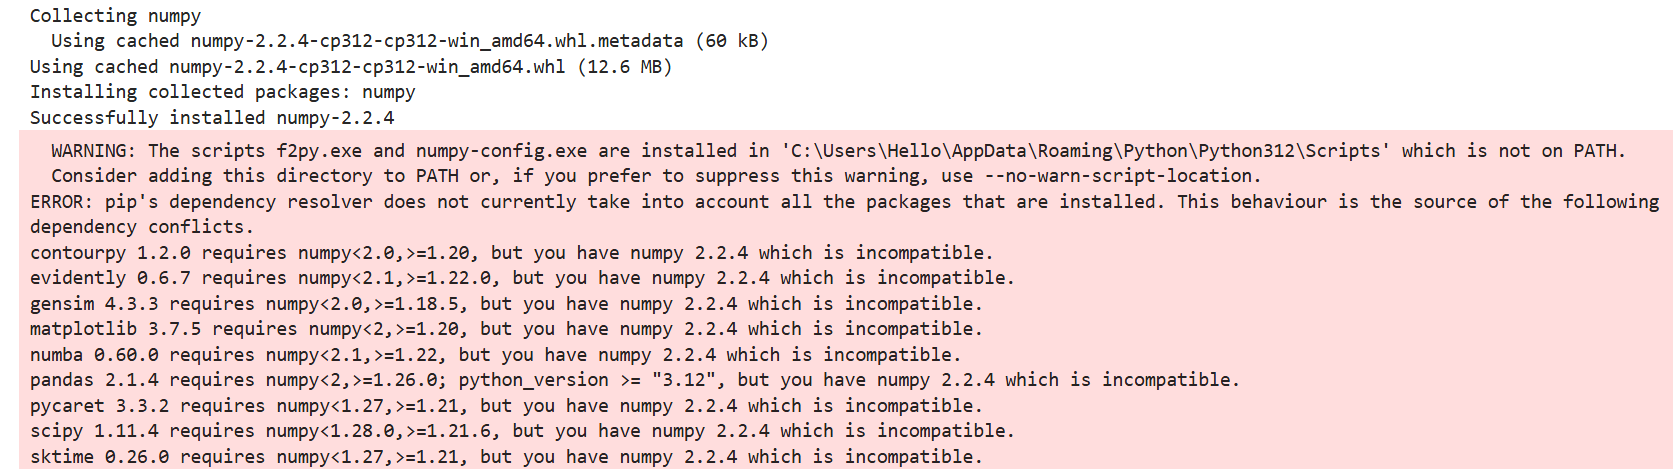


In [7]:
!pip install numpy --upgrade --ignore-installed --user


  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl (12.6 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.4 which is incompatible.
evidently 0.6.7 requires numpy<2.1,>=1.22.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
matplotlib 3.7.5 requires numpy<2,>=1.20, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.4 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.2.4 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you 

In [1]:
!pip install numpy --upgrade --ignore-installed
!pip install pycaret
from pycaret.classification import *

  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl (12.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hello\\anaconda3\\Lib\\site-packages\\numpy\\linalg\\_umath_linalg.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



#### **Step 3: Load Dataset**

**get_data('credit'):** Loads a sample credit scoring dataset built into PyCaret.

This dataset contains features like income, age, and loan amount to help predict credit default risk.

In [3]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


#### **Step 4: Split the Dataset**

**data:** 95% of the dataset is used for training and testing the model.

**data_unseen:** Remaining 5% is kept aside as unseen data to evaluate model predictions later.

In [4]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


#### **Step 5: Initialize PyCaret with setup()**

💡 setup() automatically handles preprocessing like missing values, encoding, scaling, and feature selection.

⚠️ Must run setup() before any other PyCaret function!

In [5]:
exp_clf101 = setup(data = data, target = 'default', session_id=123)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


#### **Step 6: Create a Model – Random Forest**

* 'rf': Refers to the **Random Forest algorithm**.

* create_model() trains the model using default settings on the processed data from setup().

📌 Random Forest is an ensemble method that combines multiple decision trees for better accuracy.

In [6]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8227,0.7717,0.4108,0.6591,0.5061,0.4051,0.4219
1,0.8271,0.7726,0.4023,0.6860,0.5071,0.4108,0.4323
2,0.8233,0.8079,0.4108,0.6621,0.5070,0.4065,0.4237
3,0.8120,0.7501,0.3711,0.6268,0.4662,0.3611,0.3794
4,0.8139,0.7623,0.3541,0.6443,0.4570,0.3560,0.3793
5,0.8221,0.7827,0.3909,0.6667,0.4929,0.3937,0.4144
6,0.8120,0.7607,0.3711,0.6268,0.4662,0.3611,0.3794
7,0.8258,0.7959,0.4023,0.6794,0.5053,0.4079,0.4286
8,0.8208,0.7602,0.3739,0.6701,0.4800,0.3821,0.4058


#### **Step 7: Tune the Random Forest Model**

* **create_model('rf'):** Trains a baseline Random Forest model.

* **tune_model(rf):** Automatically searches for the best hyperparameters to improve model performance.

🎯 PyCaret uses techniques like Grid Search or Random Search behind the scenes.

In [ ]:
from pycaret.classification import *

# Create the 'rf' model first
rf = create_model('rf')

# Now you can tune the model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8227,0.7717,0.4108,0.6591,0.5061,0.4051,0.4219
1,0.8271,0.7726,0.4023,0.6860,0.5071,0.4108,0.4323
2,0.8233,0.8079,0.4108,0.6621,0.5070,0.4065,0.4237
3,0.8120,0.7501,0.3711,0.6268,0.4662,0.3611,0.3794
4,0.8139,0.7623,0.3541,0.6443,0.4570,0.3560,0.3793
5,0.8221,0.7827,0.3909,0.6667,0.4929,0.3937,0.4144
6,0.8120,0.7607,0.3711,0.6268,0.4662,0.3611,0.3794
7,0.8258,0.7959,0.4023,0.6794,0.5053,0.4079,0.4286
8,0.8208,0.7602,0.3739,0.6701,0.4800,0.3821,0.4058


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8202,0.7591,0.3881,0.6587,0.4884,0.3880,0.4080
1,0.8233,0.7609,0.3711,0.6859,0.4816,0.3863,0.4128
2,0.8233,0.7875,0.3598,0.6940,0.4739,0.3803,0.4100
3,0.8170,0.7373,0.3598,0.6580,0.4652,0.3661,0.3904
4,0.8189,0.7613,0.3598,0.6684,0.4678,0.3703,0.3961
5,0.8189,0.7680,0.3456,0.6778,0.4578,0.3626,0.3922
6,0.8139,0.7321,0.3456,0.6489,0.4510,0.3513,0.3766
7,0.8315,0.7566,0.3428,0.7658,0.4736,0.3902,0.4350
8,0.8195,0.7315,0.3711,0.6650,0.4764,0.3778,0.4013


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


#### **Step 8: Evaluate Tuned Model on Holdout Set**

* This evaluates the tuned model on the holdout test set (created automatically during setup()).

* It returns predictions and shows key metrics like Accuracy, F1-Score, Recall, and AUC.

✅ A quick way to check how well the model performs before using it on unseen data.

In [8]:
from pycaret.classification import *

# Set up the environment if not already done
# setup(data, target='your_target_column')  # Ensure data is set up

# Create and tune the random forest model
tuned_rf = tune_model(create_model('rf'))

# Now, you can use predict_model with the tuned model
predictions = predict_model(tuned_rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8227,0.7717,0.4108,0.6591,0.5061,0.4051,0.4219
1,0.8271,0.7726,0.4023,0.6860,0.5071,0.4108,0.4323
2,0.8233,0.8079,0.4108,0.6621,0.5070,0.4065,0.4237
3,0.8120,0.7501,0.3711,0.6268,0.4662,0.3611,0.3794
4,0.8139,0.7623,0.3541,0.6443,0.4570,0.3560,0.3793
5,0.8221,0.7827,0.3909,0.6667,0.4929,0.3937,0.4144
6,0.8120,0.7607,0.3711,0.6268,0.4662,0.3611,0.3794
7,0.8258,0.7959,0.4023,0.6794,0.5053,0.4079,0.4286
8,0.8208,0.7602,0.3739,0.6701,0.4800,0.3821,0.4058


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8202,0.7591,0.3881,0.6587,0.4884,0.3880,0.4080
1,0.8233,0.7609,0.3711,0.6859,0.4816,0.3863,0.4128
2,0.8233,0.7875,0.3598,0.6940,0.4739,0.3803,0.4100
3,0.8170,0.7373,0.3598,0.6580,0.4652,0.3661,0.3904
4,0.8189,0.7613,0.3598,0.6684,0.4678,0.3703,0.3961
5,0.8189,0.7680,0.3456,0.6778,0.4578,0.3626,0.3922
6,0.8139,0.7321,0.3456,0.6489,0.4510,0.3513,0.3766
7,0.8315,0.7566,0.3428,0.7658,0.4736,0.3902,0.4350
8,0.8195,0.7315,0.3711,0.6650,0.4764,0.3778,0.4013


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8139,0.7450,0.3457,0.6489,0.4511,0.3513,0.3766


In [9]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8139,0.7450,0.3457,0.6489,0.4511,0.3513,0.3766


#### **Step 9: Finalizing the Model**
* finalize_model: Prepares the model for deployment by retraining on the full dataset.

* tuned_rf: The optimized version of the random forest model.

* final_rf: The finalized model ready for use.

In [13]:
final_rf = finalize_model(tuned_rf)

In [14]:
#Final Random Forest model parameters for deployment
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    transform...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
            

In [15]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8183,0.7525,0.3113,0.7009,0.4311,0.3415,0.3815


#### **Step 10: Installing Required Packages**
* This is the code to deploy model on Microsft azure using `pycaret` functionalities.

* azure-storage-blob: Installs the Azure Blob Storage client library for interacting with Azure Blob Storage.

* awscli: (Commented out) Installs AWS CLI for managing AWS services from the command line.

In [16]:
! pip install azure-storage-blob
# ! pip install awscli



#### **Step 11: Setting Up Azure Storage Connection String**

* connect_str: The Azure Storage connection string that allows access to the Azure Blob Storage account.

* print(connect_str): Displays the connection string to confirm it's set correctly.

**Important Note:** Keep your connection string secure and avoid exposing it in public code.

In [17]:
# Enter connection string when running in google colab
connect_str = 'DefaultEndpointsProtocol=https;AccountName=strjk00;AccountKey=aDsw5C0uYdGtr2me/K6wUQuEZdi0vbDtFNY/RqwM3sMlSQUC1WB/toZ5oTht1RtKJr7d+xA18o3S+AStbM8nyA==;EndpointSuffix=core.windows.net' #@param {type:"string"}
print(connect_str)

DefaultEndpointsProtocol=https;AccountName=strjk00;AccountKey=aDsw5C0uYdGtr2me/K6wUQuEZdi0vbDtFNY/RqwM3sMlSQUC1WB/toZ5oTht1RtKJr7d+xA18o3S+AStbM8nyA==;EndpointSuffix=core.windows.net


#### **Step 12: Set Up Azure Storage Access**

* This sets the Azure Storage connection string as an environment variable.

* connect_str should contain your Azure Blob Storage access key.

🔐 This step is required before saving the model to Azure.

⚠️ Never share your connect_str in public notebooks—keep it secure.

In [21]:
import os
os.environ['AZURE_STORAGE_CONNECTION_STRING']= connect_str

#### **Step 13: Verify Azure Connection String (Optional)**

In [22]:
! echo $AZURE_STORAGE_CONNECTION_STRING

$AZURE_STORAGE_CONNECTION_STRING


#### **Step 14: Accessing Azure Storage Connection String via Environment Variable**

Usage: This is used to securely store and retrieve sensitive information like connection strings instead of hardcoding them in the code.

In [25]:
os.getenv('AZURE_STORAGE_CONNECTION_STRING')

'DefaultEndpointsProtocol=https;AccountName=strjk00;AccountKey=aDsw5C0uYdGtr2me/K6wUQuEZdi0vbDtFNY/RqwM3sMlSQUC1WB/toZ5oTht1RtKJr7d+xA18o3S+AStbM8nyA==;EndpointSuffix=core.windows.net'

In [29]:
!pip install azure-storage-blob


### ⚠️ Note:
You might see a warning about version conflicts with **numpy or cryptography**. You can ignore this if the code is running without errors. It won’t affect the flow of this lab.

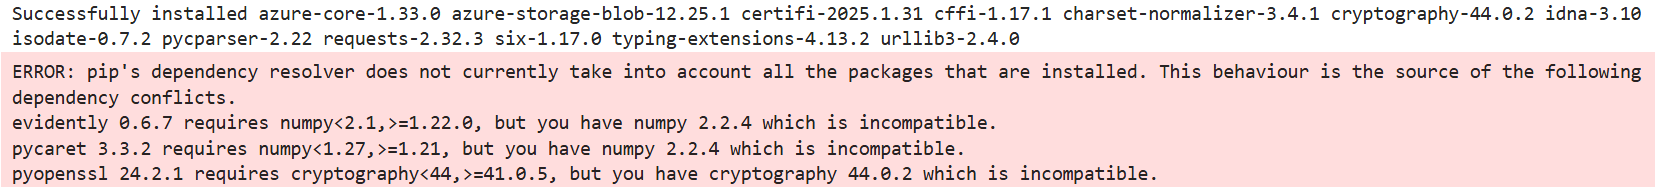

In [32]:
!pip install --upgrade --force-reinstall azure-storage-blob


  Using cached azure_storage_blob-12.25.1-py3-none-any.whl.metadata (26 kB)
  Using cached azure_core-1.33.0-py3-none-any.whl.metadata (42 kB)
  Using cached cryptography-44.0.2-cp39-abi3-win_amd64.whl.metadata (5.7 kB)
  Using cached isodate-0.7.2-py3-none-any.whl.metadata (11 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
Using cached azure_storage_blob-12.25.1-py3-none-any.whl (406 kB)
Using cached azure_core-1.33.0-py3-none-any.whl (207 kB)
Using cached cryptography-44.0.2-cp39-abi3-win_amd64.whl (3.2 MB)
Using cached isodate-0.7.2-py3-none-any.whl (22 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evidently 0.6.7 requires numpy<2.1,>=1.22.0, but you have numpy 2.2.4 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.2.4 which is incompatible.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 44.0.2 which is incompatible.


#### Step 15: Loading and Inspecting the Diabetes Dataset

This code loads the diabetes dataset from PyCaret and prints the column names to help you verify the available features.

In [14]:
from pycaret.datasets import get_data

# Load diabetes dataset
diabetes = get_data('diabetes')

# Print the column names to check
print(diabetes.columns)



,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable'],
      dtype='object')


In [20]:
from pycaret.classification import *
from pycaret.datasets import get_data

# Load and set up the diabetes dataset
diabetes = get_data('diabetes')

# Run setup and specify the correct target column
setup(data=diabetes, target='Class variable')



,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,5761
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [22]:
pip install azure-storage-blob



  Using cached azure_storage_blob-12.25.1-py3-none-any.whl.metadata (26 kB)
  Using cached azure_core-1.33.0-py3-none-any.whl.metadata (42 kB)
  Using cached isodate-0.7.2-py3-none-any.whl.metadata (11 kB)
Using cached azure_storage_blob-12.25.1-py3-none-any.whl (406 kB)
Using cached azure_core-1.33.0-py3-none-any.whl (207 kB)
Using cached isodate-0.7.2-py3-none-any.whl (22 kB)


In [28]:
from pycaret.datasets import get_data
from pycaret.classification import *

# Load diabetes dataset
diabetes = get_data('diabetes')

# Set up the dataset for modeling
setup(data=diabetes, target='Class variable')  # Replace with correct target column if needed

# Create, tune, and finalize the model
rf = create_model('rf')  # Random Forest model
tuned_rf = tune_model(rf)  # Tune the model
final_rf = finalize_model(tuned_rf)  # Finalize the model

# Save the model to a local file
save_model(final_rf, 'rf_clf_model')

# Load the model back (optional)
model_local = load_model('rf_clf_model')


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,1479
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.7752,0.4211,0.6154,0.5000,0.2998,0.3107
1,0.7593,0.8083,0.7368,0.6364,0.6829,0.4906,0.4940
2,0.7407,0.8316,0.5789,0.6471,0.6111,0.4176,0.4190
3,0.8148,0.8474,0.6842,0.7647,0.7222,0.5840,0.5860
4,0.7963,0.8850,0.5263,0.8333,0.6452,0.5123,0.5389
5,0.6481,0.7286,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7963,0.8218,0.6316,0.7500,0.6857,0.5367,0.5410
7,0.7925,0.8016,0.6111,0.7333,0.6667,0.5178,0.5223
8,0.8113,0.8738,0.6667,0.7500,0.7059,0.5677,0.5698


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6852,0.8015,0.4211,0.5714,0.4848,0.2656,0.2720
1,0.7593,0.8211,0.7368,0.6364,0.6829,0.4906,0.4940
2,0.7037,0.7955,0.4737,0.6000,0.5294,0.3175,0.3223
3,0.8519,0.8571,0.6842,0.8667,0.7647,0.6588,0.6686
4,0.7778,0.8932,0.4737,0.8182,0.6000,0.4609,0.4939
5,0.7407,0.7278,0.5789,0.6471,0.6111,0.4176,0.4190
6,0.7778,0.8361,0.5263,0.7692,0.6250,0.4749,0.4921
7,0.7925,0.8143,0.6111,0.7333,0.6667,0.5178,0.5223
8,0.8113,0.9016,0.6111,0.7857,0.6875,0.5554,0.5644


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [29]:
from pycaret.classification import save_model
save_model(final_rf, 'rf_clf_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_w

In [30]:
from pycaret.classification import load_model
model_local = load_model('rf_clf_model')


Transformation Pipeline and Model Successfully Loaded


#### **Step 15: Making Predictions on Unseen Data**
* The model is predicting on new data (data_unseen).

* The result will be stored in unseen_predictions.

* The verbose option will display detailed information during the prediction process.

In [36]:
# Example: Load the same diabetes dataset for unseen predictions
data_unseen = diabetes.sample(10)  # Select 10 random rows for prediction

# Now use the model to make predictions
unseen_predictions = predict_model(final_rf, data=data_unseen, verbose=True)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
unseen_predictions

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
0,50000,2,2,1,48,0,0,0,0,0,...,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.8443
1,200000,2,1,1,40,2,2,2,2,2,...,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.8159
2,50000,2,3,1,44,1,2,3,2,4,...,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,0,0.5088
3,60000,2,2,1,31,2,2,-1,0,0,...,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,1,0.6884
4,120000,2,3,2,32,-1,0,0,0,0,...,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.9091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,80000,1,2,2,34,2,2,2,2,2,...,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1,1,0.8159
1196,150000,1,3,2,43,-1,-1,-1,-1,0,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,0.9091
1197,30000,1,2,2,37,4,3,2,-1,0,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,1,0.6884
1198,80000,1,3,1,41,1,-1,0,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0,0.9091


#### **Step 16:**
1. **Import Libraries**

Import necessary libraries: Gradio for UI, PyCaret for ML, Pandas for data handling, JSON for logging, and Azure Blob Storage for saving predictions.

2. **Define Log Function**

* Create a log entry with timestamp, input data, prediction, and confidence score.

* Connect to Azure Blob Storage to upload the log as a JSON file.

3. **Define Prediction Function**

* Input customer details (age, credit limit, payment history, etc.) to predict default.

* Pass the input data to the model for prediction.

4. **Prepare Input Data**

* Organize the customer’s details into a dictionary for easy use in prediction.

5. **Make Prediction**

* Convert input data into a dataframe and use the trained model to predict default.

6. **Log and Return Prediction**

* Log prediction details (input data, prediction, score) to Azure.

* Return a result message showing whether the customer will default and the confidence score.

7. **Create Interface**

* Use Gradio to build a simple interface where users input customer details.

* Display the prediction result with confidence score.

In [37]:
import gradio as gr
from pycaret.classification import *
import pandas as pd
import json
from datetime import datetime
from azure.storage.blob import BlobServiceClient

def log_prediction(input_data, prediction, score):
    # Create log entry
    log_entry = {
        "timestamp": datetime.now().isoformat(),
        "inputs": input_data,
        "prediction": prediction,
        "confidence_score": float(score)
    }

    # Connect to Azure storage
    blob_service_client = BlobServiceClient.from_connection_string(connect_str)
    container_client = blob_service_client.get_container_client(authentication['container'])

    # Create blob name with timestamp
    blob_name = f"predictions/prediction_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"

    # Upload log as JSON
    blob_client = container_client.get_blob_client(blob_name)
    blob_client.upload_blob(json.dumps(log_entry))

def predict_default(limit_bal, sex, education, marriage, age, pay_1, pay_2, pay_3, pay_4, pay_5, pay_6,
                   bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6,
                   pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6):

    # Create input data dictionary
    input_data = {
        'LIMIT_BAL': limit_bal, 'SEX': sex, 'EDUCATION': education, 'MARRIAGE': marriage,
        'AGE': age, 'PAY_1': pay_1, 'PAY_2': pay_2, 'PAY_3': pay_3, 'PAY_4': pay_4,
        'PAY_5': pay_5, 'PAY_6': pay_6, 'BILL_AMT1': bill_amt1, 'BILL_AMT2': bill_amt2,
        'BILL_AMT3': bill_amt3, 'BILL_AMT4': bill_amt4, 'BILL_AMT5': bill_amt5,
        'BILL_AMT6': bill_amt6, 'PAY_AMT1': pay_amt1, 'PAY_AMT2': pay_amt2,
        'PAY_AMT3': pay_amt3, 'PAY_AMT4': pay_amt4, 'PAY_AMT5': pay_amt5,
        'PAY_AMT6': pay_amt6
    }

    # Convert to dataframe
    data = pd.DataFrame([input_data])

    # Get prediction
    prediction = predict_model(model_azure, data=data)
    pred_label = prediction['prediction_label'].iloc[0]
    pred_score = prediction['prediction_score'].iloc[0]

    # Log prediction
    log_prediction(input_data, int(pred_label), pred_score)

    # Return result with confidence score
    result = "Default" if pred_label == 1 else "No Default"
    return f"{result} (Confidence: {pred_score:.2%})"

# Create interface
iface = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(label="Credit Limit Balance (NT dollar)", value=200000),
        gr.Number(label="Sex (1=male, 2=female)", value=2, minimum=1, maximum=2),
        gr.Number(label="Education (1=graduate, 2=university, 3=high school, 4=others)", value=2, minimum=1, maximum=4),
        gr.Number(label="Marital Status (1=married, 2=single, 3=others)", value=2, minimum=1, maximum=3),
        gr.Number(label="Age (years)", value=30),
        gr.Number(label="Repayment Status Month 1 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 2 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 3 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 4 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 5 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 6 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Bill Amount Month 1 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 2 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 3 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 4 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 5 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 6 (NT dollar)", value=50000),
        gr.Number(label="Payment Amount Month 1 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 2 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 3 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 4 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 5 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 6 (NT dollar)", value=5000)
    ],
    outputs=gr.Text(label="Credit Card Default Prediction"),
    title="Credit Card Default Prediction with Azure Logging",
    description="Enter customer details to predict credit card default probability. All predictions are logged to Azure storage."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


## Used below prompt in GitHub Copilot with in the notebook to generate the below app:

##### Prompt:
Help me create a gradio app now that connects to model from blob storage and gives prediction on new data that will be entered by user in the application. put a default value in the box and also at the title of the box show which value is expected

In [38]:
import gradio as gr
from pycaret.classification import *
import pandas as pd

def predict_default(limit_bal, sex, education, marriage, age, pay_1, pay_2, pay_3, pay_4, pay_5, pay_6,
                   bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6,
                   pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6):

    # Create data dictionary
    data = {
        'LIMIT_BAL': [limit_bal], 'SEX': [sex], 'EDUCATION': [education], 'MARRIAGE': [marriage],
        'AGE': [age], 'PAY_1': [pay_1], 'PAY_2': [pay_2], 'PAY_3': [pay_3], 'PAY_4': [pay_4],
        'PAY_5': [pay_5], 'PAY_6': [pay_6], 'BILL_AMT1': [bill_amt1], 'BILL_AMT2': [bill_amt2],
        'BILL_AMT3': [bill_amt3], 'BILL_AMT4': [bill_amt4], 'BILL_AMT5': [bill_amt5],
        'BILL_AMT6': [bill_amt6], 'PAY_AMT1': [pay_amt1], 'PAY_AMT2': [pay_amt2],
        'PAY_AMT3': [pay_amt3], 'PAY_AMT4': [pay_amt4], 'PAY_AMT5': [pay_amt5],
        'PAY_AMT6': [pay_amt6]
    }

    # Convert to dataframe
    data = pd.DataFrame(data)

    # Load model from azure blob
    authentication = {'container': 'pycaret-cls-10111'}
    model = load_model('rf-clf-101', platform='azure', authentication=authentication)

    # Make prediction
    prediction = predict_model(model, data=data)

    return "Default" if prediction['prediction_label'][0] == 1 else "No Default"

# Create the interface
iface = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(label="Credit Limit Balance (NT dollar)", value=200000),
        gr.Number(label="Sex (1=male, 2=female)", value=2, minimum=1, maximum=2),
        gr.Number(label="Education (1=graduate, 2=university, 3=high school, 4=others)", value=2, minimum=1, maximum=4),
        gr.Number(label="Marital Status (1=married, 2=single, 3=others)", value=2, minimum=1, maximum=3),
        gr.Number(label="Age (years)", value=30),
        gr.Number(label="Repayment Status Month 1 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 2 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 3 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 4 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 5 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 6 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Bill Amount Month 1 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 2 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 3 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 4 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 5 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 6 (NT dollar)", value=50000),
        gr.Number(label="Payment Amount Month 1 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 2 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 3 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 4 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 5 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 6 (NT dollar)", value=5000)
    ],
    outputs=gr.Text(label="Credit Card Default Prediction"),
    title="Credit Card Default Prediction",
    description="Enter customer details to predict credit card default probability"
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


#### Step 17: Deploy Model on Google Cloud

After the model is finalised and you are happy with the model, you can deploy the model on your cloud of choice. In this section, we deploy the model on the google cloud platform.

**Step 17.1 - Install Google Cloud Storage SDK**

In [41]:
pip install --upgrade google-cloud-storage

Note: you may need to restart the kernel to use updated packages.


**Step 17.2 - Set Up Authentication with Service Account JSON**

Replace the path with your correct one, using a raw string (prefix with r) or double backslashes:

In [55]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'C:\Users\Hello\Downloads\keen-bucksaw-457308-v7-e20312101698.json'


**Step 17.3 - Initialize Google Cloud Client and List Buckets**

In [56]:
from google.cloud import storage

# Initialize a client
storage_client = storage.Client()

# List all buckets in your project
buckets = list(storage_client.list_buckets())
for bucket in buckets:
    print(bucket.name)

**Step 17.4 - Install AWS CLI**

Required by PyCaret for handling cloud storage operations, including GCP.

In [57]:
! pip install awscli

**Step 17.5 - Set GCP Project and Define Bucket**

Defines your Google Cloud Project ID and Bucket name for storing the model. Also sets the active project using gcloud CLI.

In [1]:
!gcloud --version


Google Cloud SDK 518.0.0
bq 2.1.15
core 2025.04.11
gcloud-crc32c 1.0.0
gsutil 5.33


In [2]:
# GCP project name, Change the name based on your own GCP project.
CLOUD_PROJECT = 'gcpessentials-rz' # GCP project name
bucket_name = 'pycaret-clf1011-test1' # bucket name for storage of your model
BUCKET = 'gs://' + CLOUD_PROJECT + '-{}'.format(bucket_name)
# Set the gcloud consol to $CLOUD_PROJECT Environment Variable for your Desired Project)
!gcloud config set project $CLOUD_PROJECT

Updated property [core/project].


**That means gcloud is now set up and your project (gcpessentials-rz) is correctly configured.**

**Step 17.6 - Deploy Model to Google Cloud Storage** 

Uses PyCaret’s deploy_model() function to upload the trained model to your GCS bucket.

In [1]:
from pycaret.classification import *

# (Assuming you already set up the PyCaret environment earlier)
# Setup, compare models, and finalize
# clf = setup(...)  # your setup code
# best_model = compare_models()
# final_rf = finalize_model(best_model)


In [2]:
from pycaret.classification import deploy_model

In [4]:
from pycaret.datasets import get_data
from pycaret.classification import *

# Step 1: Load sample dataset
data = get_data('iris')  # You can also use your own CSV with pd.read_csv()

# Step 2: Setup PyCaret
clf1 = setup(data, target='species')  # 'species' is the target column in iris

# Step 3: Compare models and finalize the best one
best_model = compare_models()
final_rf = finalize_model(best_model)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Description,Value
0,Session id,3166
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9818,0.0000,0.9818,0.9855,0.9815,0.9725,0.9747,0.0210
lda,Linear Discriminant Analysis,0.9818,0.0000,0.9818,0.9855,0.9815,0.9725,0.9747,0.0220
dt,Decision Tree Classifier,0.9636,0.9714,0.9636,0.9733,0.9621,0.9450,0.9511,0.0230
knn,K Neighbors Classifier,0.9627,0.9916,0.9627,0.9731,0.9611,0.9436,0.9499,0.0490
rf,Random Forest Classifier,0.9627,0.9935,0.9627,0.9707,0.9620,0.9436,0.9482,0.1240
nb,Naive Bayes,0.9545,0.9922,0.9545,0.9636,0.9538,0.9312,0.9367,0.0220
lr,Logistic Regression,0.9536,0.0000,0.9536,0.9634,0.9528,0.9298,0.9356,0.8440
et,Extra Trees Classifier,0.9536,0.9934,0.9536,0.9634,0.9528,0.9298,0.9356,0.1480
ada,Ada Boost Classifier,0.9445,0.0000,0.9445,0.9586,0.9426,0.9161,0.9246,0.0990
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9551,0.9303,0.9023,0.9149,0.1960


In [8]:
from pycaret.classification import *
import joblib  # Import joblib to save the model

# Assuming you've finalized the model
final_rf = finalize_model(best_model)

# Save the model using joblib
joblib.dump(final_rf, 'rf_model.pkl')  # Save the model as a .pkl file

print("Model saved locally as 'rf_model.pkl'")


Model saved locally as 'rf_model.pkl'


**Step 17.7: Saving and Loading a Model Locally Using joblib**

This code demonstrates how to save a trained model locally and load it back for predictions using joblib. After training the model, it is saved in a .pkl file, which can be loaded later for future use without retraining.

**Note for Trainees:** This method is useful for storing models locally to avoid retraining every time.

In [10]:
from pycaret.classification import *
import joblib  # For saving and loading the model

# Load your dataset (you can replace this with your own dataset)
from pycaret.datasets import get_data
data = get_data('iris')  # Sample dataset

# Set up PyCaret
clf1 = setup(data, target='species')  # Replace 'species' with your target column name

# Compare models and finalize the best one
best_model = compare_models()
final_rf = finalize_model(best_model)

# Save the model using joblib (local deployment)
joblib.dump(final_rf, 'rf_model.pkl')

print("Model saved locally as 'rf_model.pkl'")

# Load the saved model for further predictions
loaded_model = joblib.load('rf_model.pkl')
print("Model loaded successfully for prediction")


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Description,Value
0,Session id,3962
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0190
ada,Ada Boost Classifier,0.9909,0.0000,0.9909,0.9927,0.9905,0.9861,0.9872,0.0700
gbc,Gradient Boosting Classifier,0.9909,0.0000,0.9909,0.9927,0.9905,0.9861,0.9872,0.1520
qda,Quadratic Discriminant Analysis,0.9900,0.0000,0.9900,0.9925,0.9900,0.9851,0.9864,0.0200
nb,Naive Bayes,0.9818,1.0000,0.9818,0.9859,0.9814,0.9725,0.9747,0.0310
dt,Decision Tree Classifier,0.9818,0.9866,0.9818,0.9859,0.9814,0.9725,0.9747,0.0240
rf,Random Forest Classifier,0.9818,0.9989,0.9818,0.9859,0.9814,0.9725,0.9747,0.1480
et,Extra Trees Classifier,0.9818,1.0000,0.9818,0.9859,0.9814,0.9725,0.9747,0.1080
lightgbm,Light Gradient Boosting Machine,0.9809,0.9920,0.9809,0.9852,0.9805,0.9712,0.9736,0.3180
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9779,0.9710,0.9571,0.9607,0.6740


Model saved locally as 'rf_model.pkl'
Model loaded successfully for prediction


**Step 17.8 - Make Predictions Using the Deployed Model**

This step involves loading the trained model and using it to make predictions on unseen test data. The model, once deployed, is used to infer outcomes for new input data (without the target column), allowing you to assess the model's performance on data it hasn't seen before.

In [30]:
from pycaret.classification import *
from pycaret.datasets import get_data
import joblib

# Load the diabetes dataset (PIMA)
data = get_data('diabetes')

# Show the columns
print("✅ Available columns:", data.columns.tolist())

# Setup PyCaret with correct target column
clf = setup(data, target='Class variable', verbose=False)

# Train and finalize best model
best_model = compare_models()
final_model = finalize_model(best_model)

# Save the model locally
joblib.dump(final_model, 'diabetes_model.pkl')
print("✅ Model saved as 'diabetes_model.pkl'")

# Load the model
loaded_model = joblib.load('diabetes_model.pkl')
print("✅ Model loaded successfully")

# Create unseen data (remove target column)
data_unseen = data.drop('Class variable', axis=1)

# Predict using the loaded model
predictions = predict_model(loaded_model, data=data_unseen)
print("✅ Predictions on unseen data:")
print(predictions.head())


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


✅ Available columns: ['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age (years)', 'Class variable']


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7726,0.8237,0.5711,0.7122,0.6311,0.4710,0.4783,3.1080
lda,Linear Discriminant Analysis,0.7726,0.8240,0.5713,0.7141,0.6322,0.4717,0.4792,0.0360
ridge,Ridge Classifier,0.7707,0.8235,0.5550,0.7153,0.6219,0.4628,0.4719,0.0390
ada,Ada Boost Classifier,0.7691,0.8197,0.6205,0.6974,0.6495,0.4794,0.4870,0.1710
gbc,Gradient Boosting Classifier,0.7578,0.8368,0.6050,0.6769,0.6345,0.4555,0.4603,0.2130
rf,Random Forest Classifier,0.7541,0.8267,0.5775,0.6714,0.6192,0.4397,0.4435,0.2630
nb,Naive Bayes,0.7540,0.8128,0.6032,0.6637,0.6299,0.4466,0.4493,0.0380
lightgbm,Light Gradient Boosting Machine,0.7504,0.8180,0.6152,0.6572,0.6335,0.4449,0.4471,0.2400
et,Extra Trees Classifier,0.7486,0.8127,0.5506,0.6712,0.6025,0.4218,0.4277,0.2190
qda,Quadratic Discriminant Analysis,0.7391,0.8019,0.5500,0.6555,0.5921,0.4040,0.4111,0.0390


✅ Model saved as 'diabetes_model.pkl'
✅ Model loaded successfully


✅ Predictions on unseen data:
   Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3               

**Step 17.9- Display Unseen Predictions**
    
Shows the predictions generated from the test dataset.

In [28]:
unseen_predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.87
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.95
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.84
3,1,89,66,23,94,28.100000,0.167,21,0,0,1.00
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.86
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,0,0,0.87
764,2,122,70,27,0,36.799999,0.340,27,0,0,0.95
765,5,121,72,23,112,26.200001,0.245,30,0,0,0.96
766,1,126,60,0,0,30.100000,0.349,47,1,1,0.89


### Conclusion:

In this lab, you successfully built a **binary classification model using PyCaret** with minimal code. You explored the full ML workflow—**from loading and preparing data, comparing models, and finalizing the best one to deploying** it on the cloud. You also created a Gradio app for real-time predictions, making your model accessible and user-friendly. This hands-on lab showed how powerful and efficient low-code ML tools can be for real-world use cases like **credit risk prediction**.